In [1]:
%pylab inline
import homer
import pandas as pd
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
collection.compute_clusters('working/MC_gen_clusters_*.hdf', min_threshold=2)

NameError: name 'collection' is not defined

In [2]:
collection = homer.Homer(weighted_edge_list_globstring='tests/resources/Making_Connections_Generated_Data.hdf',
                         clusters_globstring='working/MC_gen_clusters_*.hdf', 
                         #relations_globstring='working/MC_gen_relations_*.hdf',
                         transition_clusters_globstring='working/MC_gen_transitions_*.hdf',
                         transitions_filename='working/MC_gen_transitions_list.pickle'
                        )
                         

In [3]:
collection.compute_transition_list('working/MC_gen_transitions_list.pickle')

In [4]:
collection.compute_relations('working/MC_gen_relations_*.hdf')

In [6]:
collection.compute_tree(tree_filename='working/MC_gen_tree.json.gz')

# pick up from saved

In [2]:
collection = homer.Homer(tree_filename='tests/resources/tree.json.gz')

In [7]:
tree = collection.tree

In [8]:
node = tree.find("4")
node.k_children

[5,
 6,
 7,
 8,
 9,
 greater,
 coz,
 loss,
 alive,
 gold,
 thee,
 covetous,
 gods,
 jove,
 country,
 garments]

In [12]:
node.tomorrow[0]

28

In [13]:
node.tomorrow[1]

28

In [10]:
node.p_tomorrow

[0.67647058823529416, 0.67647058823529416]

In [42]:
import matplotlib.path as mpath
import matplotlib.patches as mpatches


def connect(ax,
            node_t1, center_t1, bottom_t1,
            node_t2, center_t2, bottom_t2):
  
    left = center_t1 + .5*node_t1.width
    right = center_t2 - .5*node_t2.width
    top_t1 = bottom_t1 + node_t1.height - node_t1.pts_buffer / 2
    top_t2 = bottom_t2 + node_t2.height - node_t1.pts_buffer / 2
    center = (left + right)/2

    Path = mpath.Path
    path_data = [
        (Path.MOVETO, (left, bottom_t1)),
        (Path.CURVE4, (center, bottom_t1)),
        (Path.CURVE4, (center, bottom_t2)),
        (Path.CURVE4, (right, bottom_t2)),
        (Path.LINETO, (right, top_t2)),
        (Path.CURVE4, (center, top_t2)),
        (Path.CURVE4, (center, top_t1)),
        (Path.CURVE4, (left, top_t1)),
        (Path.CLOSEPOLY, (left, bottom_t1))
        ]
    codes, verts = zip(*path_data)
    path = mpath.Path(verts, codes)
    patch = mpatches.PathPatch(path, facecolor='grey', linewidth=0, alpha=0.1, transform=None)
    ax.add_patch(patch)
    

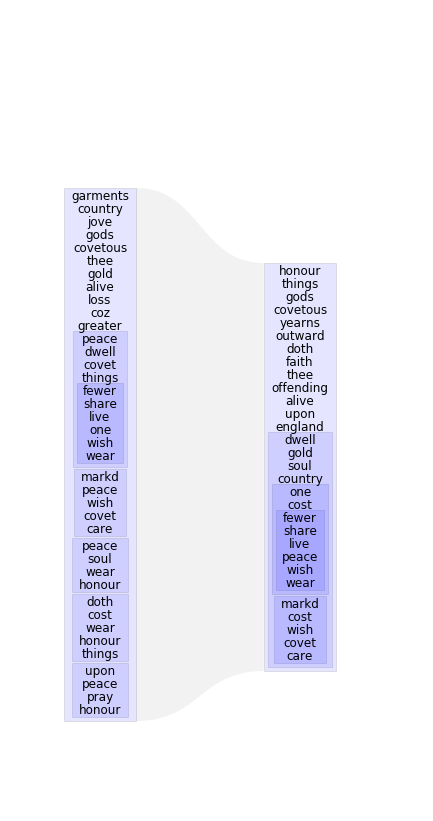

In [43]:
fig = plt.figure(figsize=(7,14))
ax = plt.gca()
node.draw(ax, 100, 100)
node2 = node.tomorrow[0]
node2.draw(ax, 300, 150)
connect(ax, 
        node, 100, 100,
        node2, 300, 150)

#ax.axis('equal')

plt.show()

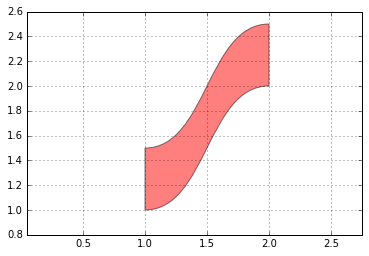

In [21]:
import matplotlib.path as mpath
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt


fig, ax = plt.subplots()

Path = mpath.Path
path_data = [
    (Path.MOVETO, (1, 1)),
    (Path.CURVE4, (1.5, 1)),
    (Path.CURVE4, (1.5, 2)),
    (Path.CURVE4, (2, 2)),
    (Path.LINETO, (2, 2.5)),
    (Path.CURVE4, (1.5, 2.5)),
    (Path.CURVE4, (1.5, 1.5)),
    (Path.CURVE4, (1, 1.5)),
    (Path.CLOSEPOLY, (1, 1))
    ]
codes, verts = zip(*path_data)
path = mpath.Path(verts, codes)
patch = mpatches.PathPatch(path, facecolor='r', alpha=0.5)
ax.add_patch(patch)

# plot control points and connecting lines
#x, y = zip(*path.vertices)
#line, = ax.plot(x, y, 'go-')

ax.grid()
ax.axis('equal')
plt.show()

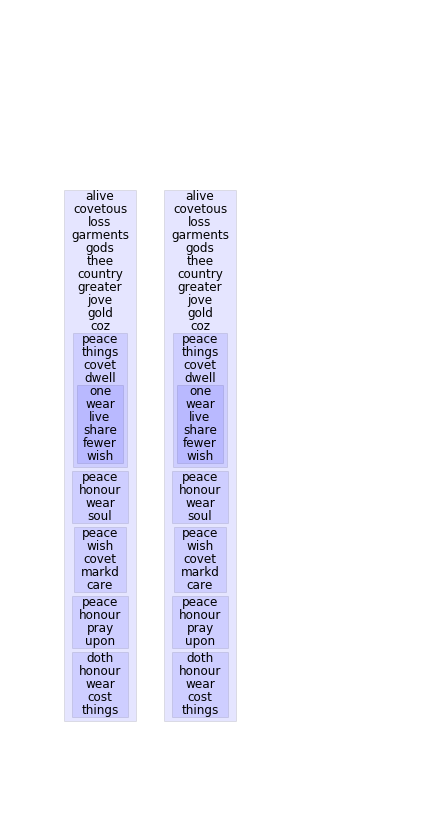

In [11]:
fig = plt.figure(figsize=(7,14))
ax = plt.gca()
node.draw(ax, 100, 100)
node.draw(ax, 200, 100)

In [33]:
collection.clusters.reset_index(drop=True).compute()

,Set,k,threshold,Date
0,live one wish peace wear,3,6,1
1,live wish wear one fewer share peace,3,13,3
2,live wish wear one fewer share peace,3,12,3
3,live wish wear one fewer share peace,3,11,3
4,live wish wear one fewer share peace,3,10,3
5,live wish wear one fewer share peace,3,5,1
6,live yearns desires dwell offending pray peace...,3,1,2
7,care markd wish covet cost,5,4,2
8,live yearns desires dwell offending gods pray ...,3,1,1
9,care markd wish covet cost,5,3,2


In [31]:
df = collection.clusters.compute()

In [32]:
df

,Set,k,threshold,Date
ID,,,,
-9056716754200133287,live one wish peace wear,3,6,1
-8968590625581934390,live wish wear one fewer share peace,3,13,3
-8968589172093433065,live wish wear one fewer share peace,3,12,3
-8968587718594951140,live wish wear one fewer share peace,3,11,3
-8968586265106449815,live wish wear one fewer share peace,3,10,3
-8968578997651467440,live wish wear one fewer share peace,3,5,1
-8851245618890672828,live yearns desires dwell offending pray peace...,3,1,2
-8782763083573580906,care markd wish covet cost,5,4,2
-8665238872588369456,live yearns desires dwell offending gods pray ...,3,1,1


In [11]:
a = collection.clusters[collection.clusters['k']==7].compute()
a

,Set,k,threshold,Date
ID,,,,
-6164480443017821638,upon fewer live honour wear share peace,7,1,1


In [14]:
child = root.find(str(a.index[0]))
child.k_children

[share, upon, peace, fewer, live, honour, wear]

In [17]:
b = collection.clusters[collection.clusters['k']==6][collection.clusters['Date']==1].compute()
b

/Users/houghton/anaconda/envs/py3k/lib/python3.5/site-packages/dask/async.py:249: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return func(*args2)


,Set,k,threshold,Date
ID,,,,
-8448021559611643807,dwell upon covet wish markd things fewer live ...,6,1,1
-6704097345979941056,care markd wish live share peace,6,1,1
-1292011934155600227,dwell markd covet wish garments one,6,1,1
-51002126403807112,care doth markd wish things live honour gods,6,1,1
2617171587878002598,upon live honour wear share peace,6,2,1
3394883846396084971,care dwell markd covet wish share,6,1,1


In [27]:
b = collection.clusters[collection.clusters['k']==5][collection.clusters['Date']==1].compute()
b

/Users/houghton/anaconda/envs/py3k/lib/python3.5/site-packages/dask/async.py:249: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return func(*args2)


,Set,k,threshold,Date
ID,,,,
-6184392761650886715,dwell markd garments covet wish one,5,2,1
-3101355562922971180,wish fewer live wear one share,5,3,1
360431357983146192,dwell upon markd garments doth jove wear engla...,5,1,1
7925733623849426782,doth upon wish things fewer live honour wear o...,5,2,1


In [28]:
parent = root.find('360431357983146192')
parent.k_children

[-8448021559611643807,
 -6704097345979941056,
 -1292011934155600227,
 -51002126403807112,
 3394883846396084971,
 jove,
 coz,
 soul,
 thee,
 england,
 gold,
 country,
 alive,
 faith,
 covetous,
 greater,
 yearns]

In [29]:
for n in homer.tree.walk_k_ancestry(parent):
    print(n, n.k_children)

share []
upon []
peace []
fewer []
live []
honour []
wear []
-6164480443017821638 [share, upon, peace, fewer, live, honour, wear]
dwell []
markd []
covet []
wish []
things []
pray []
one []
cost []
outward []
-8448021559611643807 [-6164480443017821638, dwell, markd, covet, wish, things, pray, one, cost, outward]
care []
share []
markd []
wish []
live []
peace []
-6704097345979941056 [care, share, markd, wish, live, peace]
dwell []
markd []
garments []
covet []
wish []
one []
-1292011934155600227 [dwell, markd, garments, covet, wish, one]
care []
doth []
markd []
wish []
things []
live []
honour []
gods []
-51002126403807112 [care, doth, markd, wish, things, live, honour, gods]
care []
dwell []
markd []
covet []
wish []
share []
3394883846396084971 [care, dwell, markd, covet, wish, share]
jove []
coz []
soul []
thee []
england []
gold []
country []
alive []
faith []
covetous []
greater []
yearns []
360431357983146192 [-8448021559611643807, -6704097345979941056, -1292011934155600227, -51

In [35]:
list(zip((1,2), (11, 22), (111, 222)))

[(1, 11, 111), (2, 22, 222)]

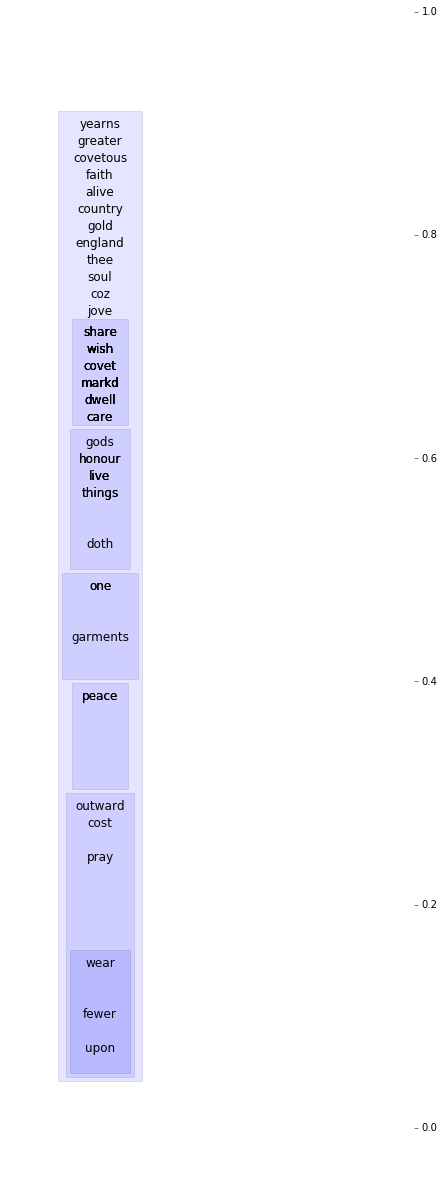

In [33]:
fig = plt.figure(figsize=(7,20))
ax = plt.gca()
ax_test = ax.twinx()
parent.layout(ax_test)
parent.set_bottom(100)
parent.set_center(100)
parent.draw(ax)

In [22]:
parent.draw()

TypeError: draw() missing 1 required positional argument: 'ax'

In [ ]:
a.k_children[2] is b.k_children[5]

In [31]:
collection.clusters[collection.clusters['k']==7].compute()

,Set,k,threshold,Date
ID,,,,
-2943944007688239924,peace share live upon honour wear fewer,7,1,1


In [37]:
collection.clusters[(collection.clusters['k']==6)].compute()

,Set,k,threshold,Date
ID,,,,
-8596872330028569940,peace share live wish fewer honour wear,6,2,3
-8596875237009315315,peace share live wish fewer honour wear,6,4,4
-8596870876536325890,peace share live wish fewer honour wear,6,3,4
-5853114226745766784,peace share live wish wear fewer honour upon,6,1,3
-4702866424366699832,outward peace share live pray markd wish dwell...,6,1,1
-2948239378724855240,care share markd wish dwell covet,6,1,1
-3346707278463544760,live one fewer honour things wear cost,6,1,3
-3172245855120495490,live one fewer honour things wear,6,2,4
-2861959016774172950,peace share live wish wear fewer honour,6,2,4
